In [1]:
%env SOCCERDATA_LOGLEVEL=ERROR
%env SOCCERDATA_NOCACHE=True
%env SOCCERDATA_NOSTORE=True

env: SOCCERDATA_LOGLEVEL=ERROR
env: SOCCERDATA_NOCACHE=True
env: SOCCERDATA_NOSTORE=True


In [2]:
import soccerdata as sd

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_context("notebook")
sns.set_style("whitegrid")

# Evolution of top team's Elo ratings

How did the current top 5 teams in the world develop over time?

In [4]:
elo = sd.ClubElo()
current_elo = elo.read_by_date()
current_elo.head()

/cw/dtaijupiter/NoCsBack/dtai/pieterr/Projects/soccerdata/soccerdata/clubelo.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(


,rank,country,level,elo,from,to,league
team,,,,,,,
Man City,1.0,ENG,1,2079.984619,2023-06-11,2023-08-11,ENG-Premier League
Liverpool,2.0,ENG,1,1949.932861,2023-06-11,2023-08-13,ENG-Premier League
Bayern,3.0,GER,1,1937.012451,2023-05-28,2023-08-18,GER-Bundesliga
Arsenal,4.0,ENG,1,1928.216187,2023-06-11,2023-08-12,ENG-Premier League
Real Madrid,5.0,ESP,1,1907.589233,2023-06-08,2023-08-12,ESP-La Liga


/cw/dtaijupiter/NoCsBack/dtai/pieterr/Projects/soccerdata/soccerdata/clubelo.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(
/cw/dtaijupiter/NoCsBack/dtai/pieterr/Projects/soccerdata/soccerdata/clubelo.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(
/cw/dtaijupiter/NoCsBack/dtai/pieterr/Projects/soccerdata/soccerdata/clubelo.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydat

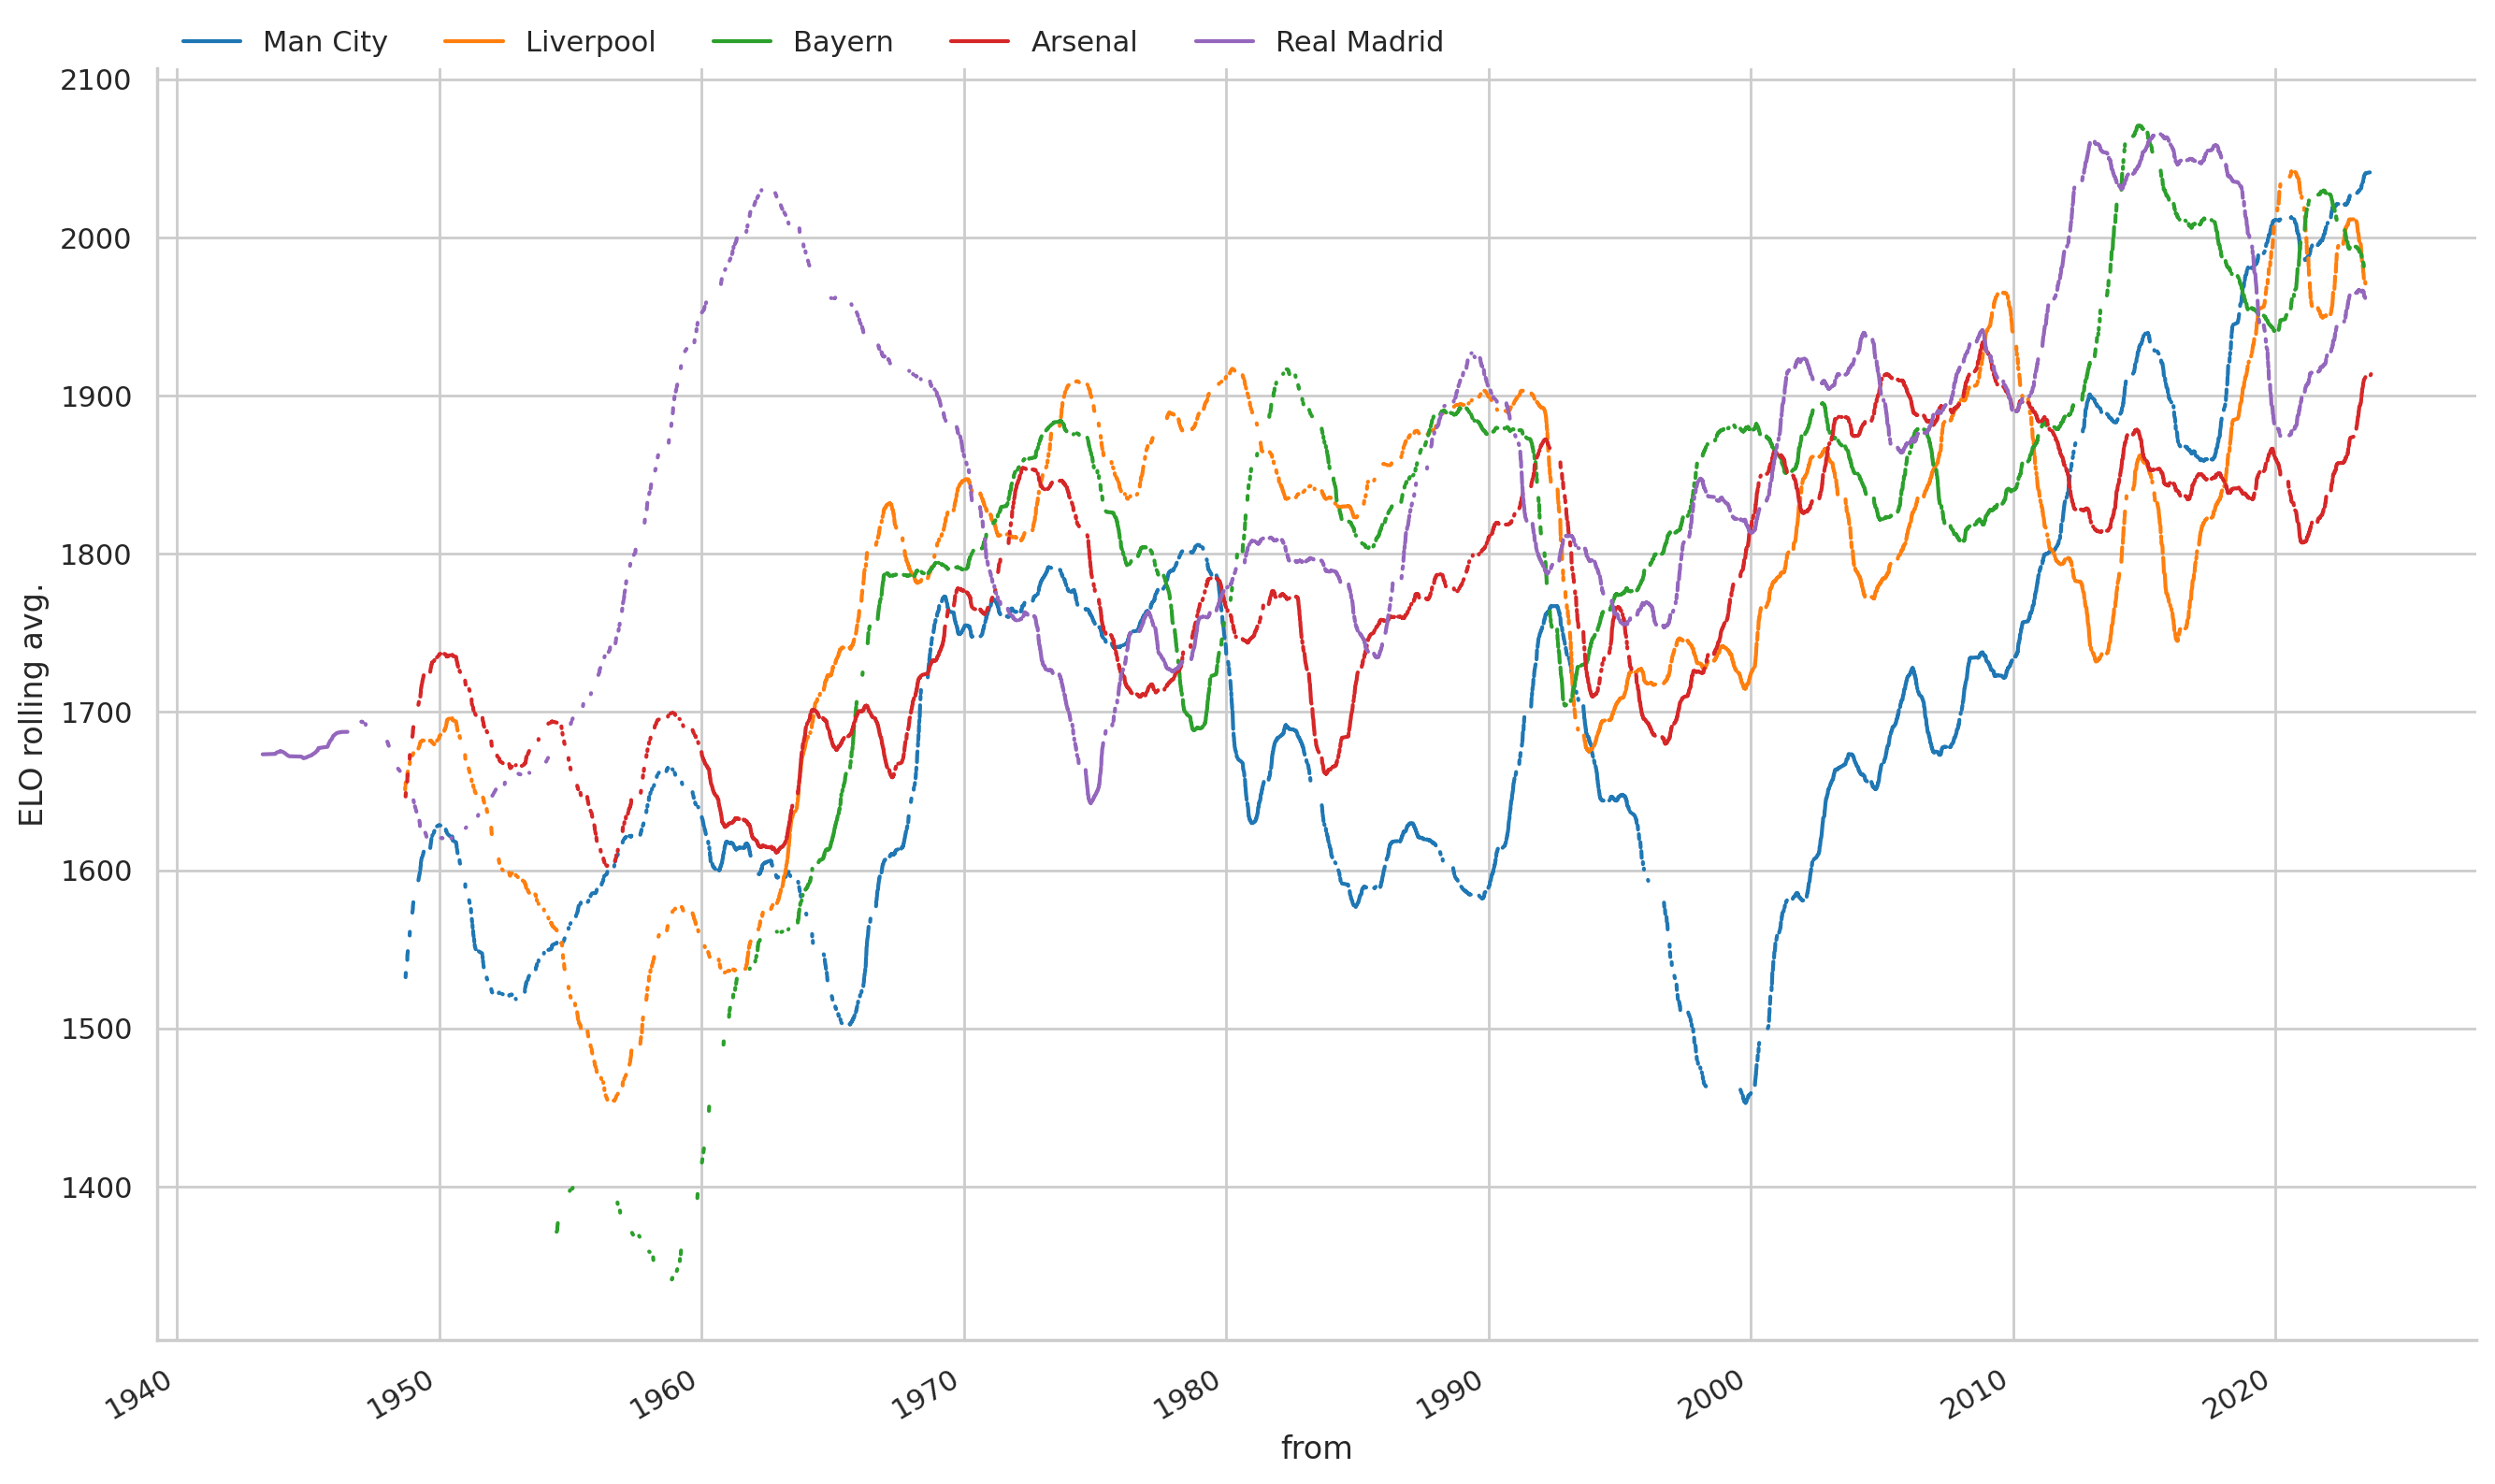

In [5]:
num_teams = 5
smoothing = 100
elo_top_development = pd.concat(
    [elo.read_team_history(team)['elo'].rolling(smoothing).mean()
     for team in current_elo.reset_index()['team'][:num_teams]
    ],
    axis=1)
elo_top_development.columns = current_elo.reset_index()['team'][:num_teams]
elo_top_development.fillna(method='ffill')

fig = plt.figure(figsize=(16, 10))
ax1 = fig.add_subplot(111, ylabel='ELO rolling avg.', xlabel='Date')
elo_top_development.plot(ax=ax1)
ax1.legend(loc='upper left', frameon=False, bbox_to_anchor=(0, 1.05), ncol=num_teams)
sns.despine();